# Обработка пропусков в данных

В заданном датасете необходимо обработать пропуски в данных для одного категориального и одного количественного признака.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\Дасупс\\Downloads\\restaurant_scores_lives_standard.csv')

Посмотрим, как в целом выглядят наши данные.

In [2]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(53973, 23)

In [4]:
df.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

## Количественные признаки

Выведем количество пропусков в каждой колонке с числовыми данными с процентным соотношением и типом данных в этой колонке.

In [5]:
for column in df.columns:
    empties = df[df[column].isnull()].shape[0]
    if empties > 0 and df[column].dtype == 'float64' :
        print(f'В колонке {column} типа {df[column].dtype} {empties} пропусков, {round(empties/df.shape[0] * 100, 2)}%')

В колонке business_latitude типа float64 19556 пропусков, 36.23%
В колонке business_longitude типа float64 19556 пропусков, 36.23%
В колонке business_phone_number типа float64 36938 пропусков, 68.44%
В колонке inspection_score типа float64 13610 пропусков, 25.22%
В колонке Neighborhoods (old) типа float64 19594 пропусков, 36.3%
В колонке Police Districts типа float64 19594 пропусков, 36.3%
В колонке Supervisor Districts типа float64 19594 пропусков, 36.3%
В колонке Fire Prevention Districts типа float64 19646 пропусков, 36.4%
В колонке Zip Codes типа float64 19576 пропусков, 36.27%
В колонке Analysis Neighborhoods типа float64 19594 пропусков, 36.3%


Сделаем некоторые выводы о количественных признаках:
* У большинства (8 из 10) фичей утеряны более трети данных, их можно заполнить, но это может сказаться на качестве модели. Их скорее можно включить при построении.
* У признака business_phone_number пропущено почти 70% строк - это недопустимо много, эту колонку лучше отбросить перед построением модели.
* В колонке inspection_score около четверти пропусков: это всё ещё достаточно много, но эту колонку можно включать в модель.

Будем заполнять пропущенные значения в колонке inspection_score, где наименьший процент пропущенных значений.

Сначала можно на гистограмме посмотреть, как распределены значения у признака.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

(array([   24.,    71.,   231.,   626.,  1977.,  3278.,  7009.,  9674.,
        11897.,  5576.]),
 array([ 45. ,  50.5,  56. ,  61.5,  67. ,  72.5,  78. ,  83.5,  89. ,
         94.5, 100. ]),
 <BarContainer object of 10 artists>)

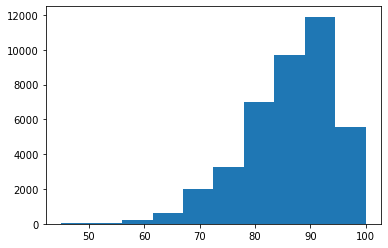

In [7]:
plt.hist(df.inspection_score)

На гистограмме видно, что распределение признака довольно сильно отличается от нормального, при этом является одномодальным. В таком случае стратегия замены пропущенных значений средним (strategy='mean') не совсем корректно, поэтому воспользуемся, например, модой.

Посмотрим на общие характеристики данных в колонке.

In [8]:
df.inspection_score.describe()

count    40363.000000
mean        86.226792
std          8.462915
min         45.000000
25%         81.000000
50%         87.000000
75%         92.000000
max        100.000000
Name: inspection_score, dtype: float64

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [11]:
df.inspection_score = imputer.fit_transform(df[['inspection_score']])

(array([2.4000e+01, 7.1000e+01, 2.3100e+02, 6.2600e+02, 1.9770e+03,
        3.2780e+03, 7.0090e+03, 9.6740e+03, 2.5507e+04, 5.5760e+03]),
 array([ 45. ,  50.5,  56. ,  61.5,  67. ,  72.5,  78. ,  83.5,  89. ,
         94.5, 100. ]),
 <BarContainer object of 10 artists>)

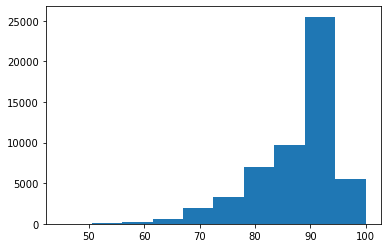

In [12]:
plt.hist(df.inspection_score)

На гистограмме видно, как изменилось распределение признака.

In [13]:
df.inspection_score.describe()

count    53973.000000
mean        87.178256
std          7.499685
min         45.000000
25%         84.000000
50%         90.000000
75%         90.000000
max        100.000000
Name: inspection_score, dtype: float64

In [14]:
df.inspection_score.isnull().any()

False

Пропущенных значений в колонке больше нет.

## Категориальные признаки

Выведем количество пропусков в каждой категориальной колонке с процентным соотношением и типом данных в этой колонке.

In [15]:
for column in df.columns:
    empties = df[df[column].isnull()].shape[0]
    if empties > 0 and df[column].dtype == 'object' :
        print(f'В колонке {column} типа {df[column].dtype} {empties} пропусков, {round(empties/df.shape[0] * 100, 2)}%')

В колонке business_postal_code типа object 1018 пропусков, 1.89%
В колонке business_location типа object 19556 пропусков, 36.23%
В колонке violation_id типа object 12870 пропусков, 23.85%
В колонке violation_description типа object 12870 пропусков, 23.85%
В колонке risk_category типа object 12870 пропусков, 23.85%


Сделаем также выводы о категориальных признаках:
* В колонке business_location пропусков больше трети, это значительное упущение данных и, возможно, колонку не стоило бы использовать для построения модели.
* В колонке business_postal_code число пропущенных значений минимально (меньше 2%), её было бы просто замечательно использовать для построения модели. 
* В колонках violation_id, violation_description, risk_category пропущенных строк чуть меньше четверти, мы вполне можем восстановить данные в одной из этих колонок и включить их в модель.

In [16]:
df.business_postal_code.unique()

array([nan, '94118', '94110', '94111', '94109', '94107', '94133', '94117',
       '94103', '94121', '94108', '94102', '94132', '94104', '94122',
       '94123', '94112', '94115', '94105', '94188', '94114', '94124',
       '94158', '94116', '94134', '94130', '94127', '94131', '94124-1917',
       'Ca', '94101', '94117-3504', '95122', '64110', '94544', '94143',
       '94080', '95132', '95112', '94102-5917', '94105-2907', '94013',
       '94301', '94120', '94105-1420', '94123-3106', '95105', '94602',
       '00000', '941102019', '94901', '94518', '95133', '95117', '94621',
       '94122-1909', '94129', '941033148', 'CA', '941', '92672', '95109'],
      dtype=object)

Как мы видим,business_postal_code, возможно, стоило бы преобразовать в числовой признак (за исключением значений с "-" и "СА").

Признак violation_id, скорее всего, содержит в основном числовые значения с некоторыми другими символами.

In [17]:
df.violation_id.unique()

array([nan, '97975_20190725_103124', '85986_20161011_103114', ...,
       '84541_20190506_103133', '91572_20190506_103116',
       '89569_20190506_103157'], dtype=object)

Так и есть.

In [18]:
df.violation_description.nunique() 

65

In [19]:
df.risk_category.nunique() 

3

В категориальном признаке risk_category есть всего 3 уникальных значения, тогда как в violation_description их 65. Заполнять пропуски мы будем там, где диверсификация значений меньше, т.е. в колонке с категорией риска.

In [20]:
df.risk_category.unique() 

array([nan, 'Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

Посмотрим, как распределены значения этих признаков по данным.

In [21]:
df.risk_category.value_counts()

Low Risk         19505
Moderate Risk    15615
High Risk         5983
Name: risk_category, dtype: int64

In [22]:
# plt.hist(df.risk_category)
# почему-то именно здесь ноутбук отчаянно не хотел рисовать мне гистограмму и ругался на то, что признак нечисловой

Наиболее часто встречающимся значением является 'Low Risk'. Именно этим значением - своего рода "модой" - будем заполнять пропуски в этом столбце. (Другой вопрос: насколько правильно мы поступаем, относя строки с пропусками значениями к "низкому риску" и не можем ли мы в этой связи упустить потенциально рискованные кейсы.)

In [23]:
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [24]:
df.risk_category = imputer_cat.fit_transform(df[['risk_category']])

In [25]:
df.risk_category.isnull().any()

False

Ещё раз проверим, как теперь распределены значения.

In [26]:
df.risk_category.value_counts()

Low Risk         32375
Moderate Risk    15615
High Risk         5983
Name: risk_category, dtype: int64

(array([32375.,     0.,     0.,     0.,     0., 15615.,     0.,     0.,
            0.,  5983.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

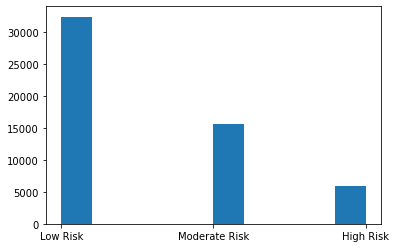

In [27]:
plt.hist(df.risk_category)

Естественно, число образцов со значением 'Low Risk' у нас значительно возросло, но и пропусков в данных в этой колонке больше нет.

## Дополнительное задание

В качестве дополнительного задания для группы РТ5-61Б необходимо построить Jointplot. Построим его для количественных признаков inspection_score и Neighborhoods (old).

Для начала заполним пропуски в Neighborhoods (old).

In [28]:
import seaborn as sns

In [29]:
df['Neighborhoods (old)'].isnull().sum()

19594

In [30]:
neigh_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [31]:
df['Neighborhoods (old)'] = neigh_imputer.fit_transform(df[['Neighborhoods (old)']])

In [32]:
df['Neighborhoods (old)'].isnull().sum()

0

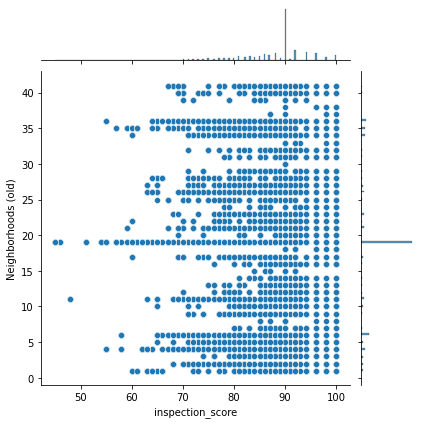

In [33]:
sns.jointplot(data=df,x="inspection_score",y="Neighborhoods (old)")